In [12]:
import yt

In [23]:
ds = yt.load("schnakenberg_imex_ard_0020.dat", unit_system="code")

yt : [INFO     ] 2022-05-28 16:00:43,844 Parameters: current_time              = 2.0
yt : [INFO     ] 2022-05-28 16:00:43,846 Parameters: domain_dimensions         = [256 256   1]
yt : [INFO     ] 2022-05-28 16:00:43,849 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-28 16:00:43,851 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-05-28 16:00:43,854 Parameters: cosmological_simulation   = 0


yt : [WARNING  ] 2022-05-28 16:00:49,123 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2022-05-28 16:00:51,181 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-28 16:00:51,184 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-28 16:00:51,186 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-28 16:00:51,189 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-28 16:00:51,192 Making a fixed resolution buffer of (('amrvac', 'u')) 800 by 800



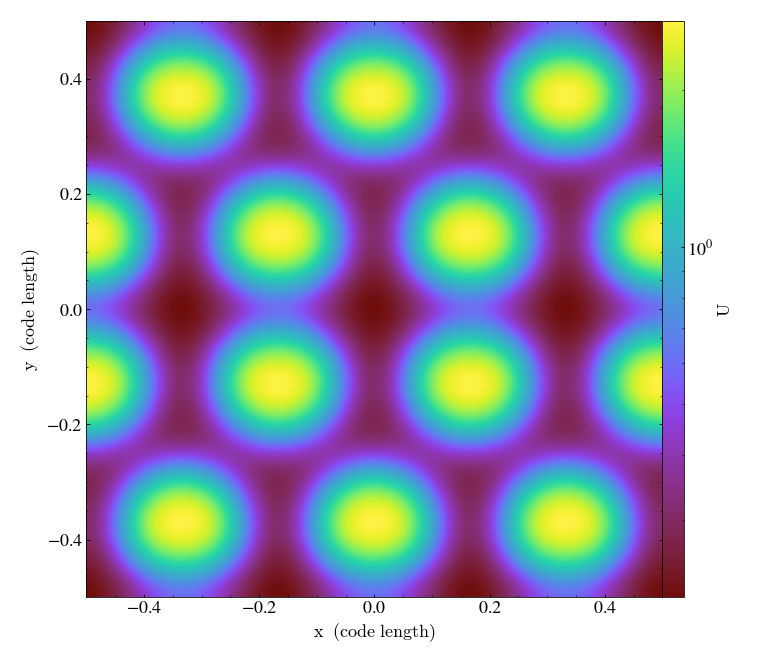

In [24]:
#ds.covering_grid() #Data in matrix uit dat file halen
p=yt.plot_2d(ds,"u")
#p.annotate_cell_edges()
#p.annotate_grids()
p.show()